
 **PGCC009 Ciência de Dados e Aprendizado de Máquina<br>
Atividade 2**

Para esta atividade vamos usar uma base disponibilizada pela iniciativa Dados Abertos de Feira (https://www.dadosabertosdefeira.com.br/) com dados de Assiduidade dos vereadores pelo painel eletrônico da Câmara de Vereadores de Feira de Santana, e podem ser acessados em https://www.kaggle.com/dadosabertosdefeira/assiduidade-dos-vereadores-painel-eletronico

Foram disponibilizados dados no formato texto original e também em JSON, obtidos por script que extraiu e estruturou a informações. Com base no JSON, foi extraído um CSV  (código disponível em https://www.kaggle.com/dadosabertosdefeira/assiduidade-dos-vereadores-painel-eletronico/code)

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

from IPython.display import display, HTML

import urllib.request

In [46]:
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36')]
urllib.request.install_opener(opener)

url = "http://aulas.artificial.eng.br/Home/pgcc009/AssiduidadeVereadoresFeiradeSantana-DadosAbertosdeFeira.csv.zip"
urllib.request.urlretrieve (url, "assiduidade.csv.zip")

paineldf = pd.read_csv("assiduidade.csv.zip",index_col=False, compression='zip')

paineldf['date']= pd.to_datetime(paineldf['date'], format='%d/%m/%Y')

In [47]:
display("DIMENSOES",paineldf.shape)

display(paineldf.head(5))

'DIMENSOES'

(15195, 11)

,Unnamed: 0,agency,report,session,date,report_generated_by,report_generated_at,name,party,text,attendance
0,0,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,ALBERTO NERY,PT,NaN,attending
1,1,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,CADMIEL PEREIRA,DEM,NaN,attending
2,2,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,EDVALDO LIMA,MDB,NaN,attending
3,3,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,ELI RIBEIRO,REP,NaN,attending
4,4,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,FABIANO DA VAN,MDB,NaN,attending


O conjunto de dados de Assiduidade dos vereadores pelo painel eletrônico tem 15195 registros e 11 atributos.

In [48]:
display(paineldf.nunique())

display(paineldf.dtypes)

Unnamed: 0              28
agency                   1
report                   1
session                223
date                   438
report_generated_by      1
report_generated_at    209
name                    41
party                   16
text                    12
attendance               3
dtype: int64

Unnamed: 0                      int64
agency                         object
report                         object
session                        object
date                   datetime64[ns]
report_generated_by            object
report_generated_at            object
name                           object
party                          object
text                           object
attendance                     object
dtype: object

In [49]:
display( paineldf['attendance'].unique() )               

ausentesdf = paineldf[ paineldf['attendance'] == 'absent']

display(ausentesdf.head(5))

array(['attending', 'justified', 'absent'], dtype=object)

,Unnamed: 0,agency,report,session,date,report_generated_by,report_generated_at,name,party,text,attendance
67,13,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,91ª SESSÃO ORDINÁRIA,2020-11-16,Yago Shamady,10/12/2020 11:38,ELI RIBEIRO,REP,NaN,absent
68,14,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,91ª SESSÃO ORDINÁRIA,2020-11-16,Yago Shamady,10/12/2020 11:38,FABIANO DA VAN,MDB,NaN,absent
69,15,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,91ª SESSÃO ORDINÁRIA,2020-11-16,Yago Shamady,10/12/2020 11:38,MARCOS LIMA,DEM,NaN,absent
70,16,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,91ª SESSÃO ORDINÁRIA,2020-11-16,Yago Shamady,10/12/2020 11:38,NEINHA,DEM,NaN,absent
71,17,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,91ª SESSÃO ORDINÁRIA,2020-11-16,Yago Shamady,10/12/2020 11:38,ZÉ CURUCA,DEM,NaN,absent


In [50]:
presencadf = paineldf

presencadf['year'] = presencadf.date.dt.year

presencadf = presencadf.groupby(['year','attendance']).count()

display(presencadf)

Unnamed: 0  agency  report  ...  name  party  text
year attendance                              ...                   
2017 absent             485     485     485  ...   485    485     0
     attending         1300    1300    1300  ...  1300   1300     0
     justified          510     510     510  ...   510    510   510
2018 absent            1348    1348    1348  ...  1348   1348     0
     attending         2599    2599    2599  ...  2599   2599     0
     justified         1128    1128    1128  ...  1128   1128  1128
2019 absent            1200    1200    1200  ...  1200   1200     0
     attending         2678    2678    2678  ...  2678   2678     0
     justified         1117    1117    1117  ...  1117   1117  1117
2020 absent              51      51      51  ...    51     51     0
     attending         1864    1864    1864  ...  1864   1864     0
     justified          682     682     682  ...   682    682   682
2021 absent               1       1       1  ...     1      1     0
     attending          207     207     207  ...   207    207     0
     justified           25      25      25  ...    25     25    25

[15 rows x 10 columns]

In [51]:
df = paineldf
df.head()

,Unnamed: 0,agency,report,session,date,report_generated_by,report_generated_at,name,party,text,attendance,year
0,0,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,ALBERTO NERY,PT,NaN,attending,2020
1,1,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,CADMIEL PEREIRA,DEM,NaN,attending,2020
2,2,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,EDVALDO LIMA,MDB,NaN,attending,2020
3,3,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,ELI RIBEIRO,REP,NaN,attending,2020
4,4,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,FABIANO DA VAN,MDB,NaN,attending,2020


## Quem são os vereadores de cada partido a cada ano? 

In [52]:
dados["year"].unique()

array([2020, 2017, 2019, 2021, 2018])

Total de vereadores na base de dados de 2017-2021

In [ ]:
columns = ['name', 'party', 'year', 'date']
dados = df[columns]

dados["name"].unique()

array(['ALBERTO NERY', 'CADMIEL PEREIRA', 'EDVALDO LIMA', 'ELI RIBEIRO',
       'FABIANO DA VAN', 'GERUSA SAMPAIO', 'GILMAR AMORIM',
       'ISAÍAS DE DIOGO', 'JOSÉ CARNEIRO', 'LUIZ DA FEIRA', 'LULINHA',
       'MARCOS LIMA', 'NEINHA', 'ROBERTO TOURINHO', 'RON DO POVO',
       'SGT JOSAFÁ RAMOS', 'ZÉ CURUCA', 'ZÉ FILÉ',
       'ANTONIO CARLOS ATAÍDE', 'CÍNTIA MACHADO', 'EREMITA MOTA',
       'JOÃO BILILIU', 'JUSTINIANO FRANÇA', 'PABLO ROBERTO', 'PR TOM',
       'ROBECI DA VASSOURA', 'RONNY', 'CORREIA ZEZITO', 'EMERSON MINHO',
       'FERNANDO TORRES', 'GALEGUINHO SPA', 'JHONATAS MONTEIRO',
       'JURANDY CARVALHO', 'LÚ DE RONNY', 'PAULÃO DO CALDEIRÃO',
       'PEDRO AMÉRICO', 'PEDRO CICERO', 'PR. VALDEMIR SANTOS',
       'PROFESSOR IVAMBERG', 'SILVIO DIAS', 'PETRONIO LIMA'], dtype=object)

#### Houveram quantos vereadores diferentes nos ultimos anos?

In [ ]:
len(dados["name"].unique())

41

#### Houveram quantos partidos diferentes nos ultimos anos?

In [ ]:
dados["party"].unique()

array(['PT', 'DEM', 'MDB', 'REP', 'PROS', 'PSB', 'PATRI', 'PSD', 'PSDB',
       'PHS', 'DC', 'PSOL', 'PL', 'PSC', 'CIDADAN', 'PV'], dtype=object)

In [ ]:
len(dados["party"].unique())

16

#### Para o ano de 2021

In [97]:
vereadores2021 = dados.query("year == 2021")["name"].unique()
vereadores2021

array(['CORREIA ZEZITO', 'EDVALDO LIMA', 'ELI RIBEIRO', 'EMERSON MINHO',
       'EREMITA MOTA', 'FABIANO DA VAN', 'FERNANDO TORRES',
       'GALEGUINHO SPA', 'JHONATAS MONTEIRO', 'JURANDY CARVALHO',
       'LÚ DE RONNY', 'LUIZ DA FEIRA', 'LULINHA', 'PAULÃO DO CALDEIRÃO',
       'PEDRO AMÉRICO', 'PEDRO CICERO', 'PR. VALDEMIR SANTOS',
       'PROFESSOR IVAMBERG', 'RON DO POVO', 'SILVIO DIAS', 'ZÉ CURUCA',
       'GERUSA SAMPAIO', 'JOSÉ CARNEIRO', 'PETRONIO LIMA'], dtype=object)

In [ ]:
len(dados.query("year == 2021")["name"].unique())

24

In [ ]:
dados.query("year == 2021")["party"].unique()

array(['PATRI', 'MDB', 'REP', 'DC', 'PSDB', 'PSD', 'PSB', 'PSOL', 'PL',
       'PROS', 'DEM', 'PSC', 'CIDADAN', 'PV', 'PT'], dtype=object)

In [93]:
vereadores2021
nomes = []

for i in vereadores2012:
   nomes.append(i)

NOMES_AGRUPADA = {'Nome': nomes}
nomes2021 = pd.DataFrame(NOMES_AGRUPADA)

nomes2021 = nomes2021.sort_values(by='Nome')

#### Para todos os anos

In [98]:
vereadores2021 = np.append(vereadores2021, ['None'])
vereadores2021 = np.append(vereadores2021, ['None'])
vereadores2021 = np.append(vereadores2021, ['None'])
vereadores2021.shape

(27,)

In [99]:
dadosAnos = pd.DataFrame()

nome = []
partido = []

dadosAnos['Name2021'] = vereadores2021

dados2021 = dados.query("year == 2020")
dados2021 = dados2021[['name','party']].groupby(['name','party']).count().sort_values(by=['name'], ascending = True)

for n in dados2021.index:
  nome.append(n[0])
  partido.append(n[1])

dadosAnos['Name 2020'] = nome
dadosAnos['Partido 2020'] = partido

nome = []
partido = []

dados2020 = dados.query("year == 2019")
dados2020 = dados2020[['name','party']].groupby(['name','party']).count().sort_values(by=['name'], ascending = True)

for n in dados2020.index:
  nome.append(n[0])
  partido.append(n[1])

dadosAnos['Name 2019'] = nome
dadosAnos['Partido 2019'] = partido

nome = []
partido = []

dados2020 = dados.query("year == 2018")
dados2020 = dados2020[['name','party']].groupby(['name','party']).count().sort_values(by=['name'], ascending = True)

for n in dados2020.index:
  nome.append(n[0])
  partido.append(n[1])

dadosAnos['Name 2018'] = nome
dadosAnos['Partido 2028'] = partido

nome = []
partido = []

dados2020 = dados.query("year == 2017")
dados2020 = dados2020[['name','party']].groupby(['name','party']).count().sort_values(by=['name'], ascending = True)

for n in dados2020.index:
  nome.append(n[0])
  partido.append(n[1])

dadosAnos['Name 2017'] = nome
dadosAnos['Partido 2017'] = partido

nome = []
partido = []

dadosAnos

,Name2021,Name 2020,Partido 2020,Name 2019,Partido 2019,Name 2018,Partido 2028,Name 2017,Partido 2017
0,CORREIA ZEZITO,ALBERTO NERY,PT,ALBERTO NERY,PT,ALBERTO NERY,PT,ALBERTO NERY,PT
1,EDVALDO LIMA,ANTONIO CARLOS ATAÍDE,DEM,ANTONIO CARLOS ATAÍDE,DEM,ANTONIO CARLOS ATAÍDE,DEM,ANTONIO CARLOS ATAÍDE,DEM
2,ELI RIBEIRO,CADMIEL PEREIRA,DEM,CADMIEL PEREIRA,DEM,CADMIEL PEREIRA,DEM,CADMIEL PEREIRA,DEM
3,EMERSON MINHO,CÍNTIA MACHADO,REP,CÍNTIA MACHADO,REP,CÍNTIA MACHADO,REP,CÍNTIA MACHADO,REP
4,EREMITA MOTA,EDVALDO LIMA,MDB,EDVALDO LIMA,MDB,EDVALDO LIMA,MDB,EDVALDO LIMA,MDB
5,FABIANO DA VAN,ELI RIBEIRO,REP,ELI RIBEIRO,REP,ELI RIBEIRO,REP,ELI RIBEIRO,REP
6,FERNANDO TORRES,EREMITA MOTA,PSDB,EREMITA MOTA,PSDB,EREMITA MOTA,PSDB,EREMITA MOTA,PSDB
7,GALEGUINHO SPA,FABIANO DA VAN,MDB,FABIANO DA VAN,MDB,FABIANO DA VAN,MDB,FABIANO DA VAN,MDB
8,JHONATAS MONTEIRO,GERUSA SAMPAIO,DEM,GERUSA SAMPAIO,DEM,GERUSA SAMPAIO,DEM,GERUSA SAMPAIO,DEM
9,JURANDY CARVALHO,GILMAR AMORIM,MDB,GILMAR AMORIM,MDB,GILMAR AMORIM,MDB,GILMAR AMORIM,MDB


Podemos observar que houveram algumas mudanças em relação ao quadro de vereadores após as eleições de 2020, mas alguns nomes se mantem, ou seja, foram reeleitos, como Edvaldo Lima, Eli RIbeiro, Eremito Mota, Fabiano da Van, mas no Geral, podese observar que a maior parte do quadro dos vereadores foi renovada.

## Quem são os vereadores com maior quantidade (absoluta e relativa) de presenças, ausências e faltas justificadas a cada ano?

In [ ]:
df.head(1)

,Unnamed: 0,agency,report,session,date,report_generated_by,report_generated_at,name,party,text,attendance,year
0,0,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,ALBERTO NERY,PT,NaN,attending,2020


In [ ]:
df["attendance"].unique()

array(['attending', 'justified', 'absent'], dtype=object)

In [ ]:
attend = df[ df['attendance'] == 'attending']
absent = df[ df['attendance'] == 'absent']
justify = df[ df['attendance'] == 'justified']

In [ ]:
attend2020 = attend[attend['year'] == 2020]
absent2020 = absent[absent['year'] == 2020]
justify2020 = justify[justify['year'] == 2020]

In [ ]:
attend2020["name"].unique()

array(['ELI RIBEIRO', 'FABIANO DA VAN', 'MARCOS LIMA', 'NEINHA',
       'ZÉ CURUCA', 'RON DO POVO', 'GILMAR AMORIM', 'ROBECI DA VASSOURA',
       'ALBERTO NERY', 'ANTONIO CARLOS ATAÍDE', 'CADMIEL PEREIRA',
       'EDVALDO LIMA', 'ISAÍAS DE DIOGO', 'JOÃO BILILIU', 'LUIZ DA FEIRA',
       'LULINHA', 'ROBERTO TOURINHO', 'ZÉ FILÉ'], dtype=object)

In [ ]:
len(attend2020["name"].unique())

18

In [ ]:
len(absent2020["name"].unique())

18

In [ ]:
attend2020.name.value_counts()

JOSÉ CARNEIRO            96
ZÉ FILÉ                  95
LULINHA                  95
CADMIEL PEREIRA          95
MARCOS LIMA              93
ISAÍAS DE DIOGO          93
GILMAR AMORIM            93
ROBERTO TOURINHO         92
FABIANO DA VAN           91
GERUSA SAMPAIO           91
ZÉ CURUCA                90
LUIZ DA FEIRA            90
RON DO POVO              87
EDVALDO LIMA             86
ELI RIBEIRO              83
NEINHA                   83
ALBERTO NERY             83
ANTONIO CARLOS ATAÍDE    81
JOÃO BILILIU             76
EREMITA MOTA             63
SGT JOSAFÁ RAMOS         57
ROBECI DA VASSOURA       25
JUSTINIANO FRANÇA        10
CÍNTIA MACHADO            9
PABLO ROBERTO             7
Name: name, dtype: int64

In [ ]:
attend2020.party.value_counts()

DEM      645
MDB      546
PSD      171
REP       92
PSB       92
PROS      90
PT        83
PSDB      63
PATRI     57
PHS       25
Name: party, dtype: int64

In [ ]:
absent2020.name.value_counts()

RON DO POVO              9
NEINHA                   7
ZÉ CURUCA                6
FABIANO DA VAN           5
ROBERTO TOURINHO         4
MARCOS LIMA              3
GILMAR AMORIM            3
ELI RIBEIRO              3
ROBECI DA VASSOURA       2
ZÉ FILÉ                  1
ALBERTO NERY             1
JOÃO BILILIU             1
ANTONIO CARLOS ATAÍDE    1
CADMIEL PEREIRA          1
LULINHA                  1
LUIZ DA FEIRA            1
EDVALDO LIMA             1
ISAÍAS DE DIOGO          1
Name: name, dtype: int64

In [ ]:
absent2020.party.value_counts()

MDB     19
DEM     19
PSB      4
REP      3
PSD      2
PHS      2
PROS     1
PT       1
Name: party, dtype: int64

Pode-se observar no quadro de presença dos vereadores, alguns nomes apresentaram uma quantidade de presenças muito baixa, se comparado com a maioria. É possível que este acontecimento tenha relação com algum afastamento ou direcionamento do vereador para alguma outra função e a partir de então um suplente assumiu sua função. É possível também que as pessoas com uma baixa taxa de presença seja um suplente que assumiu tardiamente e com isso teve um período curto do mandato.

## Escolha 3 vereadores, determine a quantidade de presenças, a quantidade de ausências e a quantidade de faltas justificadas de cada vereador a cada mês de cada ano

In [103]:
colunas = ["attendance", "date"]

NEINHA = df[ df['name'] == 'NEINHA']
#NEINHA = NEINHA[colunas]

LULINHA = df[ df['name'] == 'LULINHA']
JOSE_CARNEIRO = df[ df['name'] == 'JOSÉ CARNEIRO']

In [104]:
NEINHA_PRESENCA = NEINHA[NEINHA['attendance'] == 'attending']
NEINHA_AUSENCIA = NEINHA[NEINHA['attendance'] == 'absent']
NEINHA_JUSTIFICADO = NEINHA[NEINHA['attendance'] == 'justified']

LULINHA_PRESENCA = LULINHA[LULINHA['attendance'] == 'attending']
LULINHA_AUSENCIA = LULINHA[LULINHA['attendance'] == 'absent']
LULINHA_JUSTIFICADO = LULINHA[LULINHA['attendance'] == 'justified']

JOSE_CARNEIRO_PRESENCA = JOSE_CARNEIRO[JOSE_CARNEIRO['attendance'] == 'attending']
JOSE_CARNEIRO_AUSENCIA = JOSE_CARNEIRO[JOSE_CARNEIRO['attendance'] == 'absent']
JOSE_CARNEIRO_JUSTIFICADO = JOSE_CARNEIRO[JOSE_CARNEIRO['attendance'] == 'justified']

In [ ]:
#NEINHA_ORD = pd.concat([NEINHA_PRESENCA, NEINHA_AUSENCIA, NEINHA_JUSTIFICADO], axis=1)
#NEINHA_ORD

#### Ausências, presenças e faltas justificadas no total

In [ ]:
NEINHA_AUSENCIA.name.value_counts(), NEINHA_PRESENCA.name.value_counts(), NEINHA_JUSTIFICADO.name.value_counts()

(NEINHA    170
 Name: name, dtype: int64, NEINHA    360
 Name: name, dtype: int64, NEINHA    24
 Name: name, dtype: int64)

In [ ]:
LULINHA_AUSENCIA.name.value_counts(), LULINHA_PRESENCA.name.value_counts(), LULINHA_JUSTIFICADO.name.value_counts()

(LULINHA    102
 Name: name, dtype: int64, LULINHA    459
 Name: name, dtype: int64, LULINHA    1
 Name: name, dtype: int64)

In [ ]:
JOSE_CARNEIRO_AUSENCIA.name.value_counts(), JOSE_CARNEIRO_PRESENCA.name.value_counts(), JOSE_CARNEIRO_JUSTIFICADO.name.value_counts()

(JOSÉ CARNEIRO    43
 Name: name, dtype: int64, JOSÉ CARNEIRO    510
 Name: name, dtype: int64, JOSÉ CARNEIRO    11
 Name: name, dtype: int64)

In [ ]:
period = [                                                                             'August2017', 'September2017', 'October2017', 'November2017', 'December2017', 
                        'February2018', 'March2018', 'April2018', 'May2018', 'June2018', 'July2018', 'August2018', 'September2018', 'October2018', 'November2018', 'December2018',
          'January2019', 'February2019', 'March2019', 'April2019', 'May2019', 'June2019',         'August2019', 'September2019', 'October2019', 'November2019', 'December2019',
                         'February2020', 'March2020', 'April2020', 'May2020', 'June2020',        'August2020', 'September2020', 'October2020', 'November2020', 'December2020',
                          'February2021', 'February2021']

#### Relação das presenças dos três vereadores ao longo do mandato

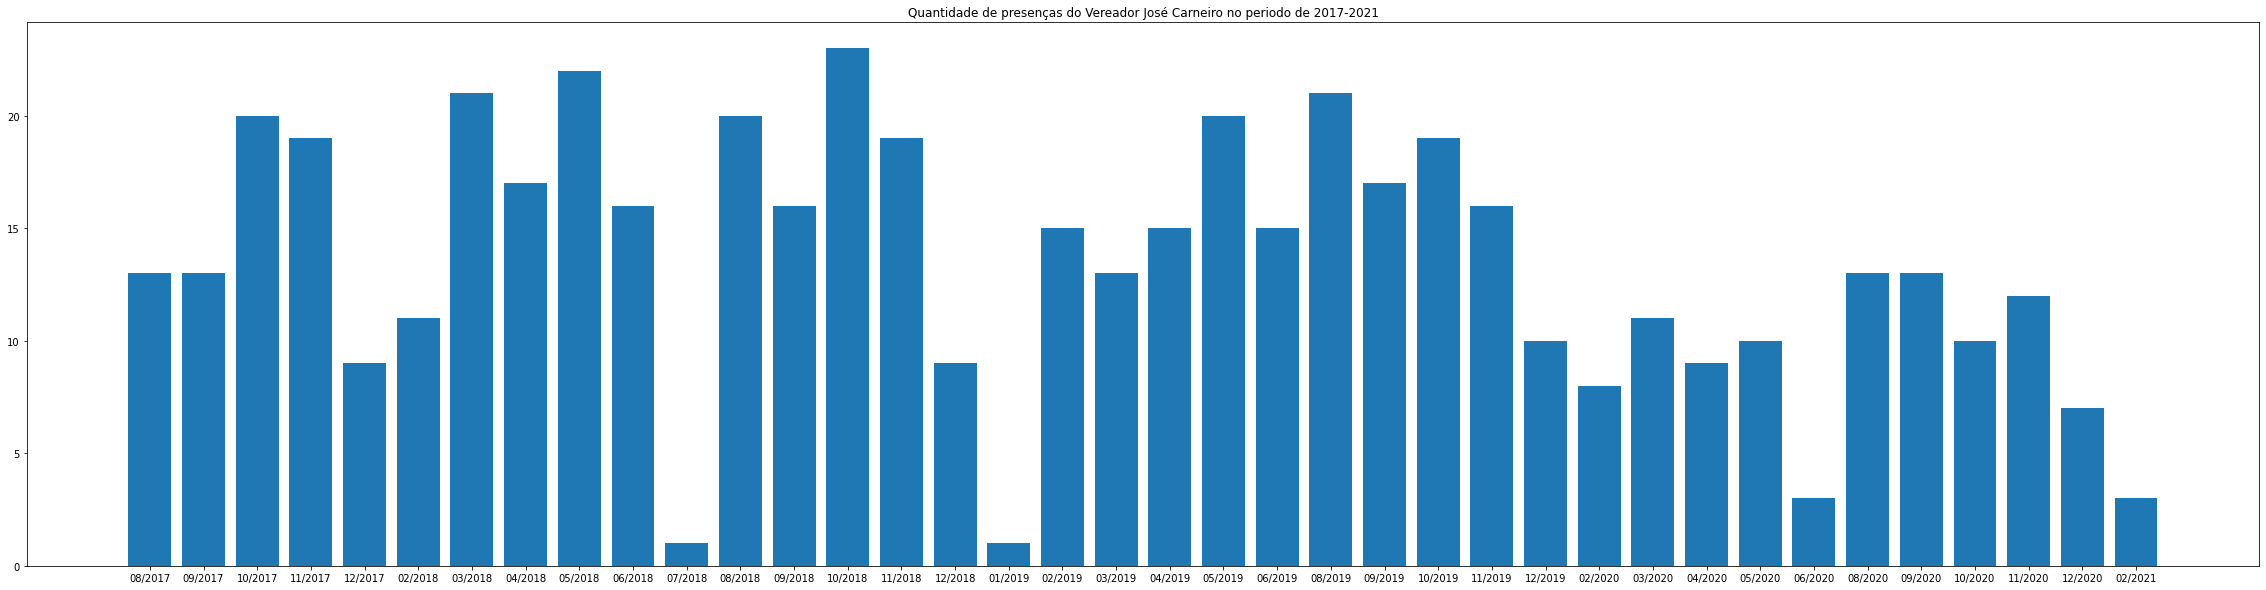

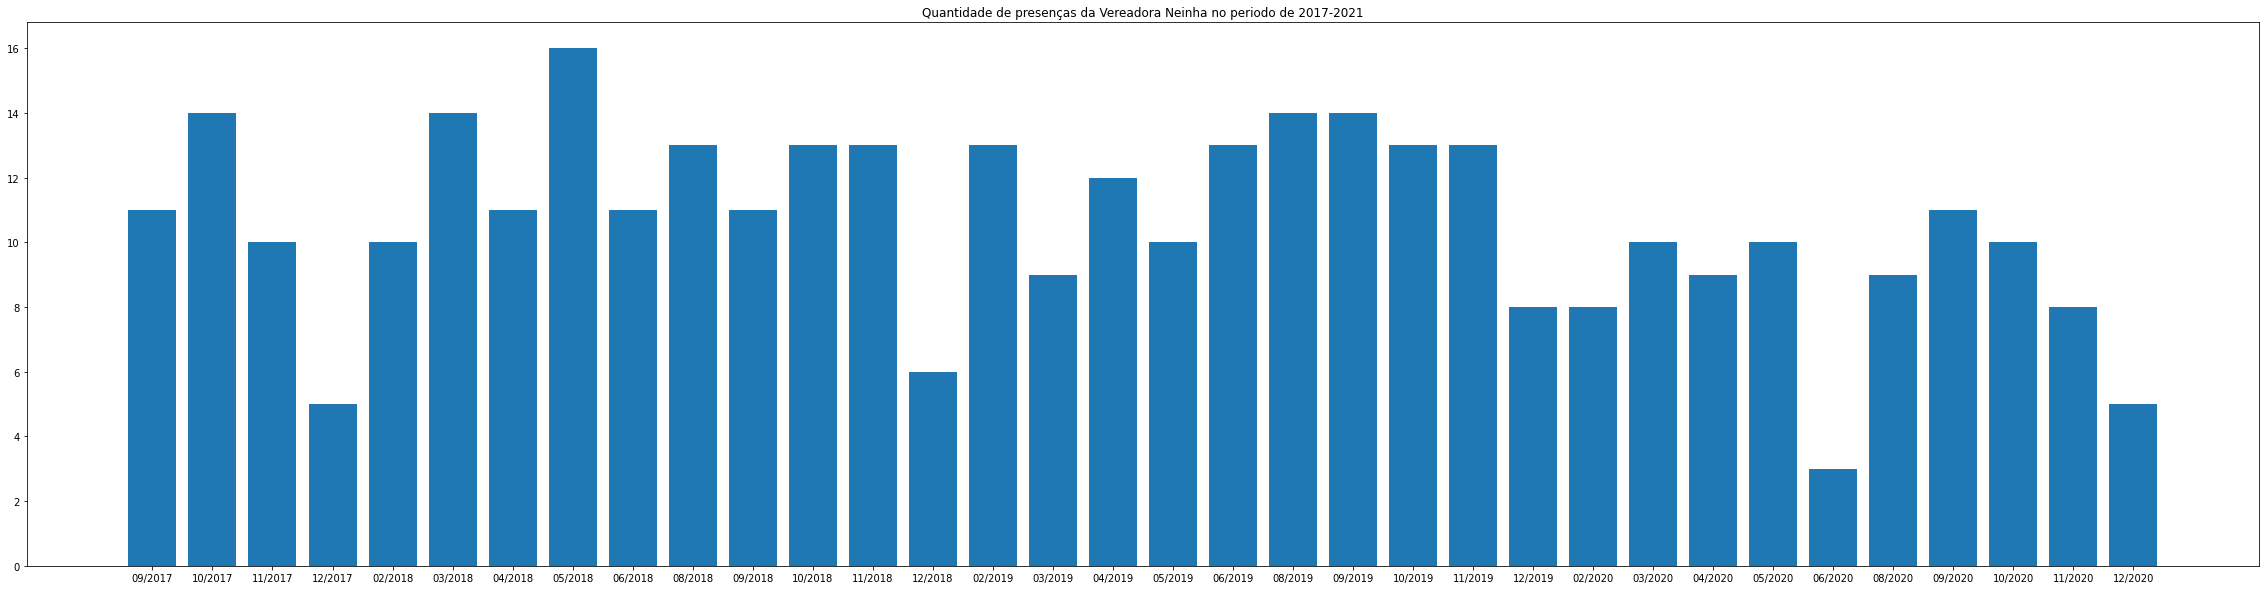

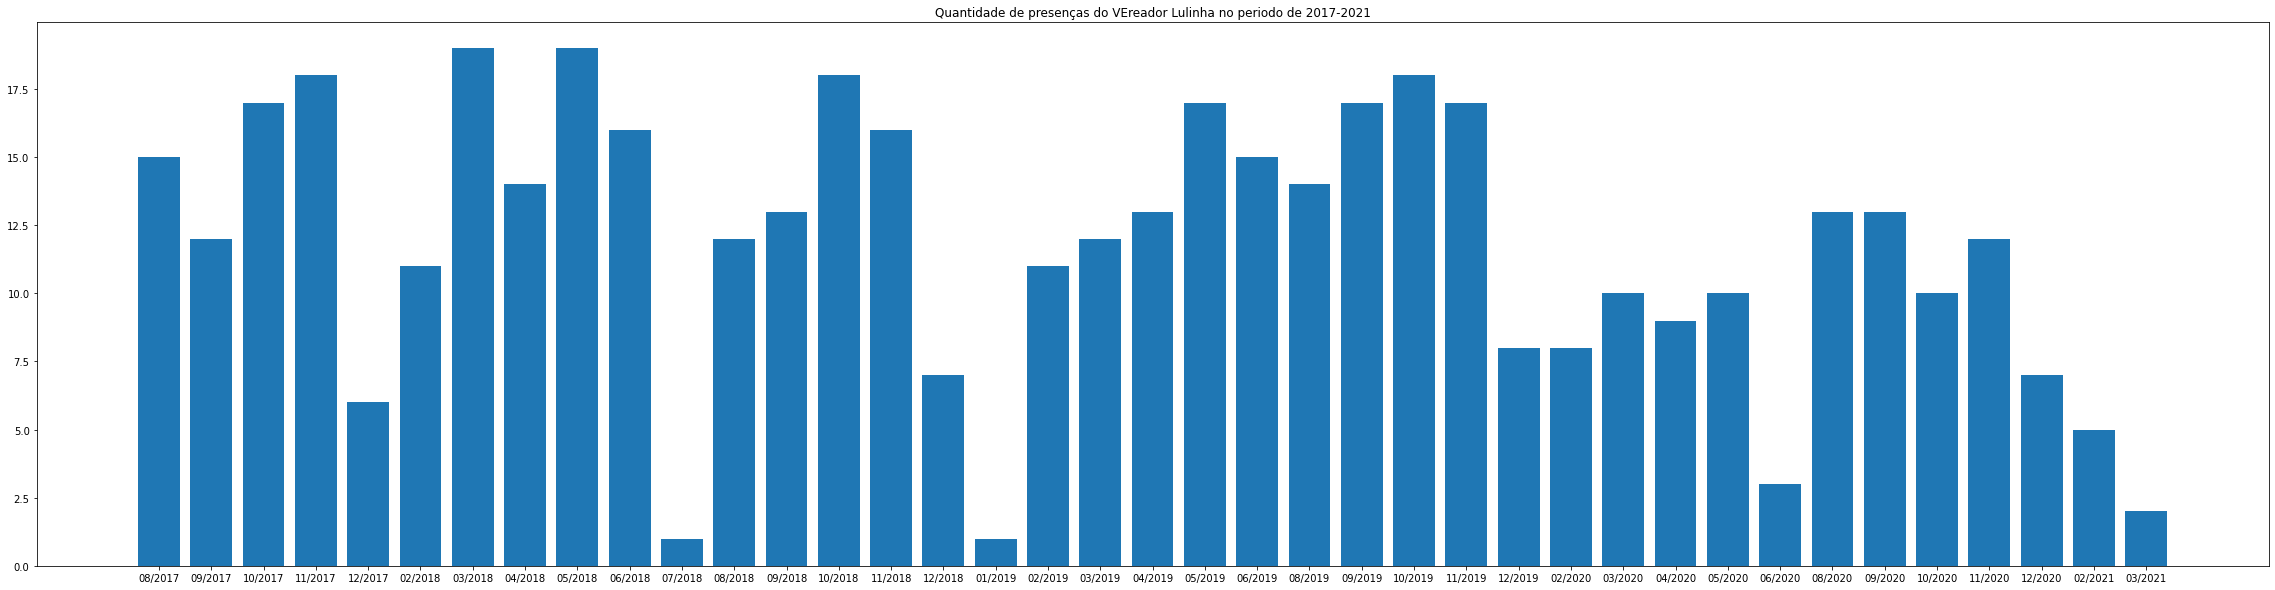

In [105]:
DataJ = JOSE_CARNEIRO_PRESENCA[['date', 'attendance']]
DataJ = DataJ.groupby(DataJ["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataJ.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataJ = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataJ['Date'] = pd.to_datetime(DataJ.Mes)
DataJ = DataJ.sort_values('Date')
DataJ = DataJ.sort_values(by='Date')

DataJ = DataJ[['Presenca', 'Date']]

presenca_j = DataJ['Presenca']
data_j = DataJ['Date']

time_j = []
for i in DataJ['Date']:
  time_j.append(i.strftime("%m/%Y"))

plt.figure(figsize=(40,10))
plt.title('Quantidade de presenças do Vereador José Carneiro no periodo de 2017-2021')
plt.bar(time_j, DataJ['Presenca'].to_numpy())
plt.show()

######

DataN = NEINHA_PRESENCA[['date', 'attendance']]
DataN = DataN.groupby(DataN["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataN.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataN = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataN['Date'] = pd.to_datetime(DataN.Mes)
DataN = DataN.sort_values('Date')
DataN = DataN.sort_values(by='Date')

DataN = DataN[['Presenca', 'Date']]

time_n = []
for i in DataN['Date']:
  time_n.append(i.strftime("%m/%Y"))

plt.figure(figsize=(40,10))
plt.title('Quantidade de presenças da Vereadora Neinha no periodo de 2017-2021')
plt.bar(time_n, DataN['Presenca'].to_numpy())
plt.show()

######

DataL = LULINHA_PRESENCA[['date', 'attendance']]
DataL = DataL.groupby(DataL["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataL.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataL = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataL['Date'] = pd.to_datetime(DataL.Mes)
DataL = DataL.sort_values('Date')
DataL = DataL.sort_values(by='Date')

DataL = DataL[['Presenca', 'Date']]

time_l = []
for i in DataL['Date']:
  time_l.append(i.strftime("%m/%Y"))

plt.figure(figsize=(40,10))
plt.title('Quantidade de presenças do VEreador Lulinha no periodo de 2017-2021')
plt.bar(time_l, DataL['Presenca'].to_numpy())
plt.show()

Uma observação interessante é em relação aos mêses de Dezembro e Janeiro, a presença na é extremante baixa ou inexistente. Como se trata de um perídodo de fim de ano e férias, é possível que estes acontecimentos estejam associados a isso. O mês de fevereito também apresenta um grande número de ausências, uma hipótese é que isso está associado ao período de carnaval.

Observamos também que no mês 06/2020 houve uma baixa presença nos três vereadores estudados. Como se trata de um mês junino, tradicionalmente um mês festivo, é possível que haja uma relação.

### Relação das ausências de cada um dos vereadores ao longo do mandato.

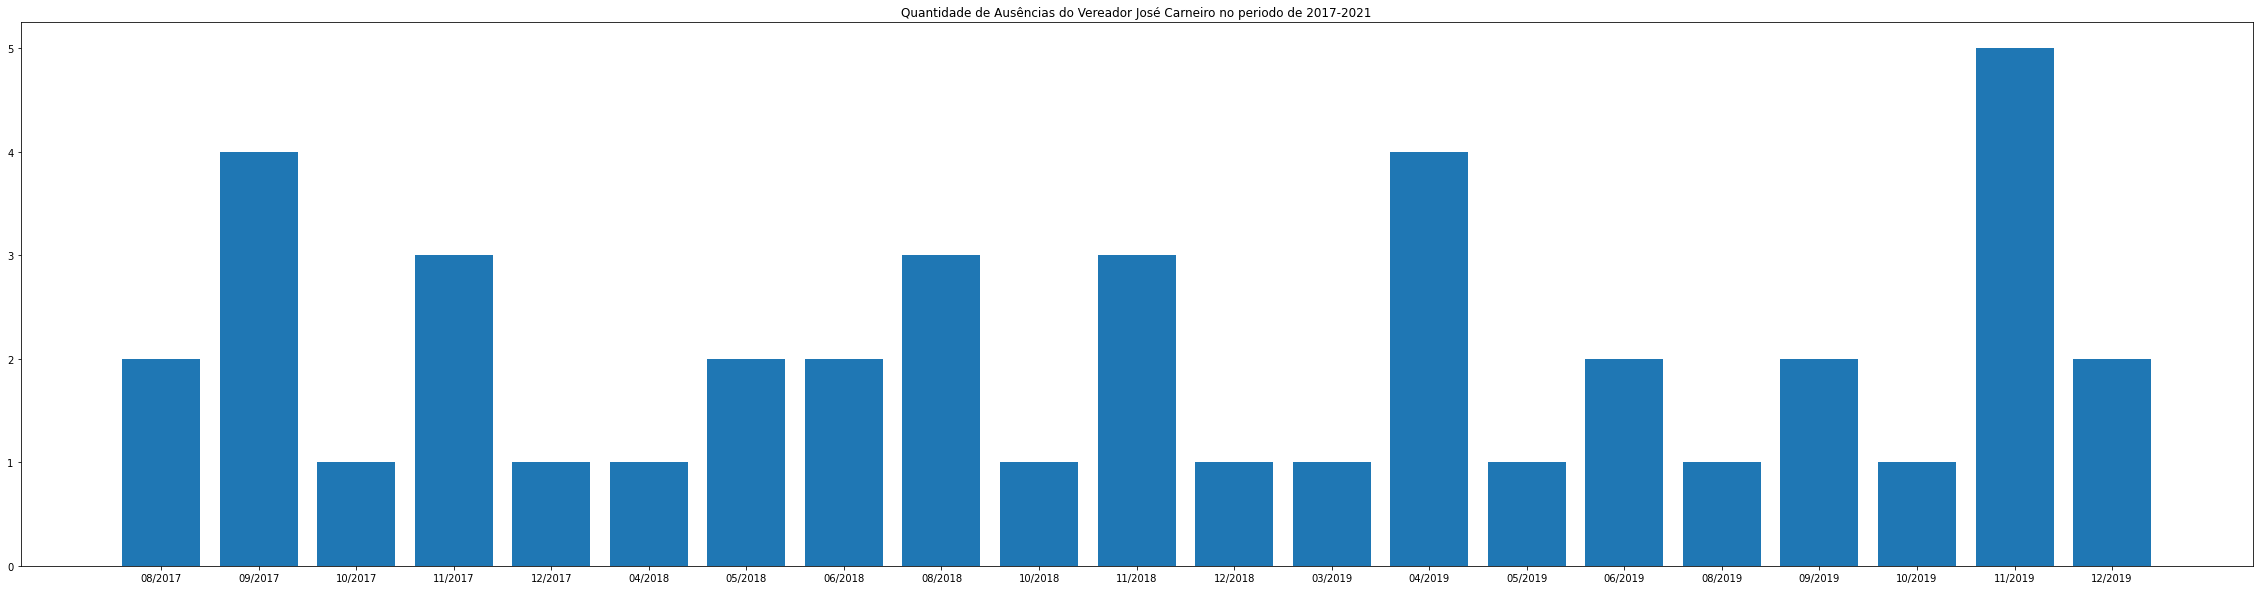

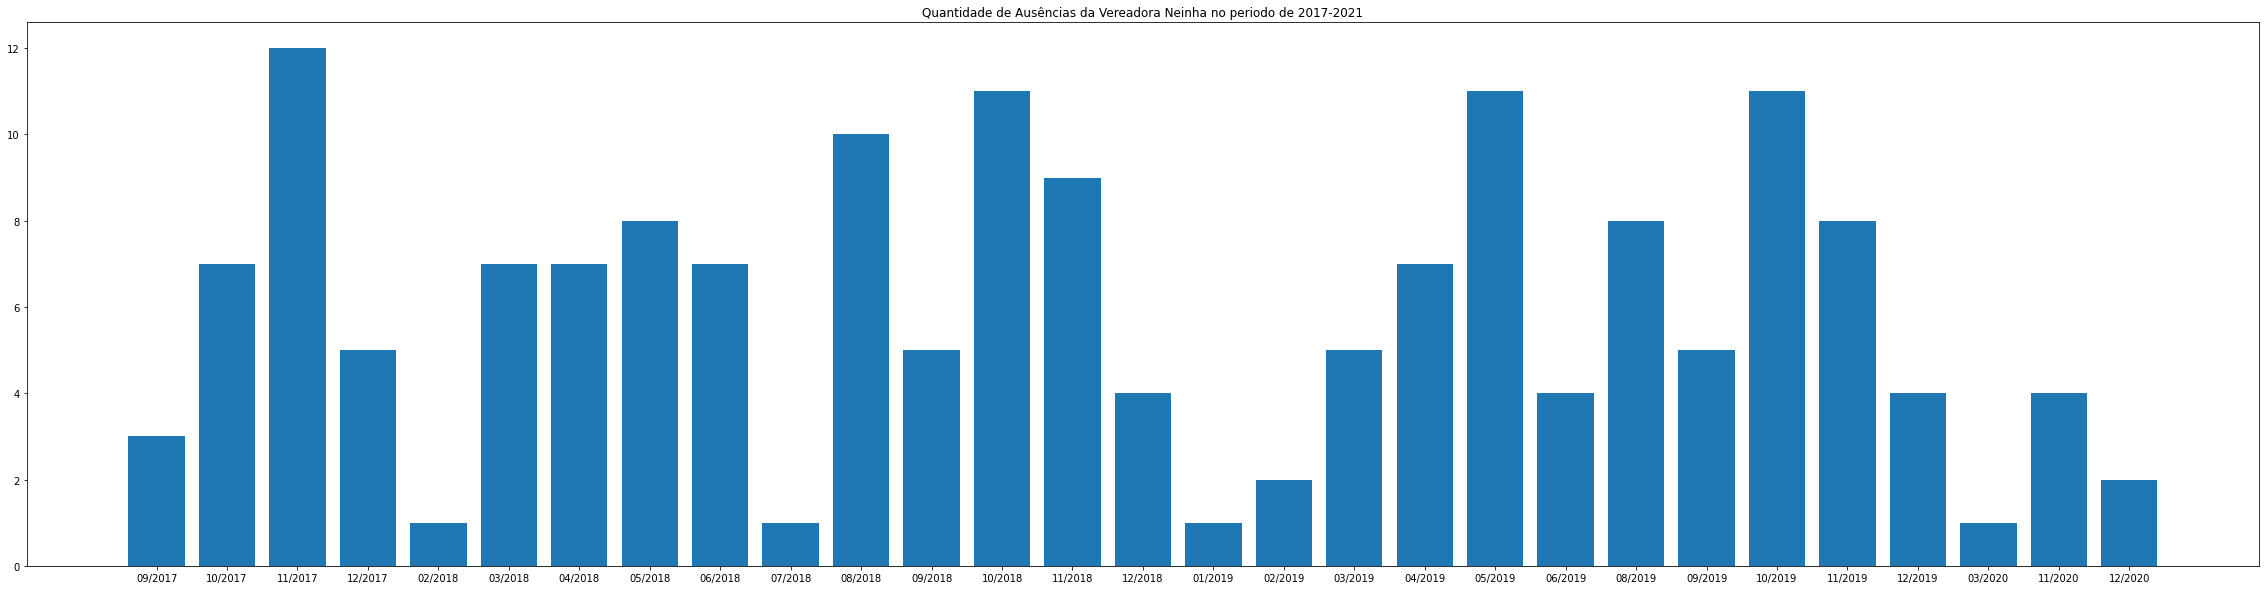

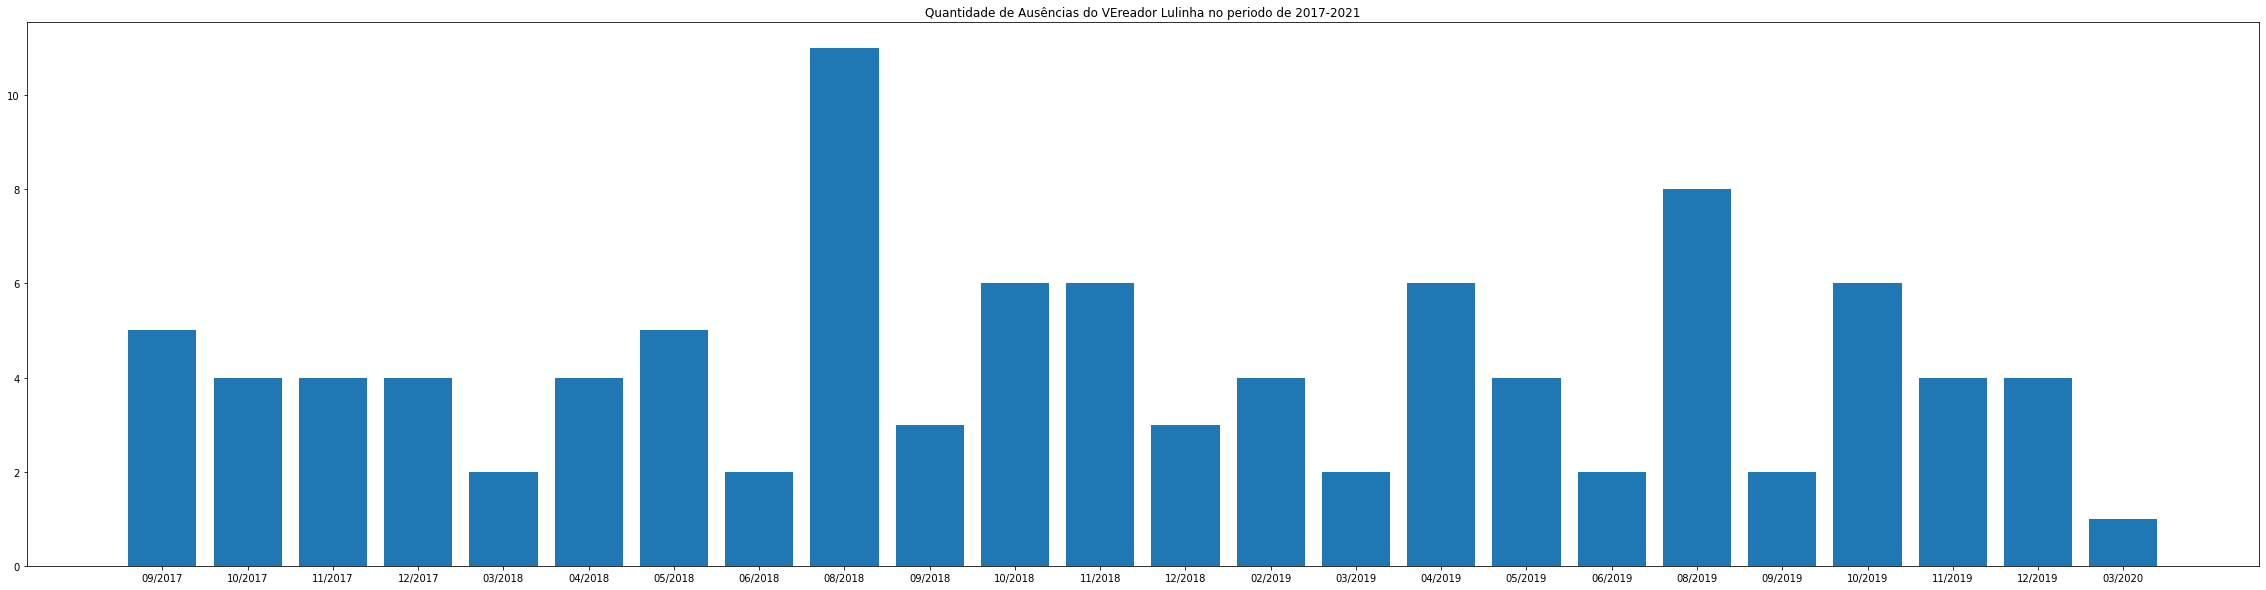

In [106]:
DataJ = JOSE_CARNEIRO_AUSENCIA[['date', 'attendance']]
DataJ = DataJ.groupby(DataJ["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataJ.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataJ = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataJ['Date'] = pd.to_datetime(DataJ.Mes)
DataJ = DataJ.sort_values('Date')
DataJ = DataJ.sort_values(by='Date')

DataJ = DataJ[['Presenca', 'Date']]

presenca_j = DataJ['Presenca']
data_j = DataJ['Date']

time_j = []
for i in DataJ['Date']:
  time_j.append(i.strftime("%m/%Y"))

plt.figure(figsize=(40,10))
plt.title('Quantidade de Ausências do Vereador José Carneiro no periodo de 2017-2021')
plt.bar(time_j, DataJ['Presenca'].to_numpy())
plt.show()

######

DataN = NEINHA_AUSENCIA[['date', 'attendance']]
DataN = DataN.groupby(DataN["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataN.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataN = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataN['Date'] = pd.to_datetime(DataN.Mes)
DataN = DataN.sort_values('Date')
DataN = DataN.sort_values(by='Date')

DataN = DataN[['Presenca', 'Date']]

time_n = []
for i in DataN['Date']:
  time_n.append(i.strftime("%m/%Y"))

plt.figure(figsize=(40,10))
plt.title('Quantidade de Ausências da Vereadora Neinha no periodo de 2017-2021')
plt.bar(time_n, DataN['Presenca'].to_numpy())
plt.show()

######

DataL = LULINHA_AUSENCIA[['date', 'attendance']]
DataL = DataL.groupby(DataL["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataL.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataL = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataL['Date'] = pd.to_datetime(DataL.Mes)
DataL = DataL.sort_values('Date')
DataL = DataL.sort_values(by='Date')

DataL = DataL[['Presenca', 'Date']]

time_l = []
for i in DataL['Date']:
  time_l.append(i.strftime("%m/%Y"))

plt.figure(figsize=(40,10))
plt.title('Quantidade de Ausências do VEreador Lulinha no periodo de 2017-2021')
plt.bar(time_l, DataL['Presenca'].to_numpy())
plt.show()


### Relação das ausÊncias Justificadas de cada um dos vereadores ao longo do mantado.

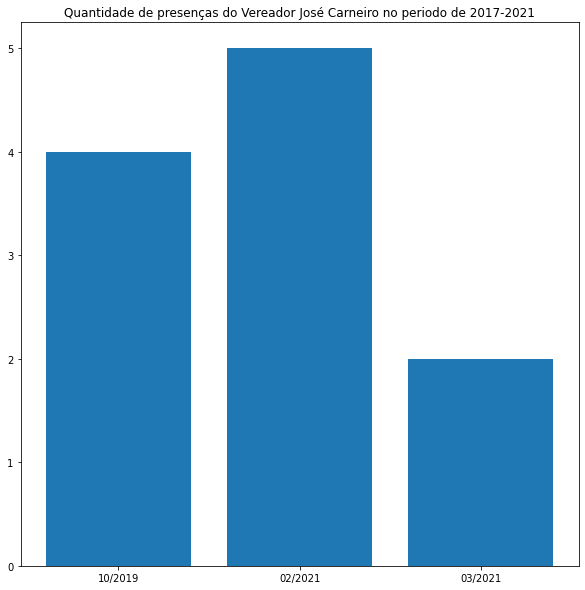

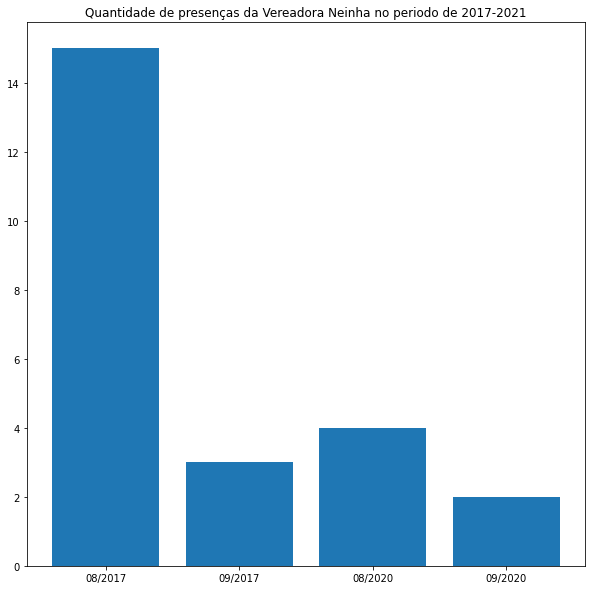

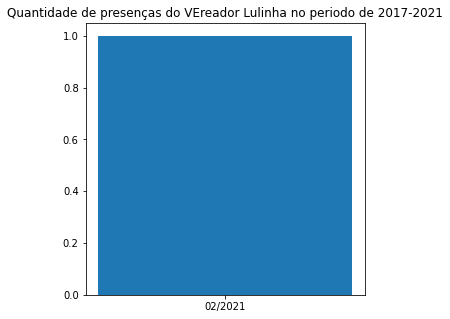

In [ ]:
DataJ = JOSE_CARNEIRO_JUSTIFICADO[['date', 'attendance']]
DataJ = DataJ.groupby(DataJ["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataJ.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataJ = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataJ['Date'] = pd.to_datetime(DataJ.Mes)
DataJ = DataJ.sort_values('Date')
DataJ = DataJ.sort_values(by='Date')

DataJ = DataJ[['Presenca', 'Date']]

presenca_j = DataJ['Presenca']
data_j = DataJ['Date']

time_j = []
for i in DataJ['Date']:
  time_j.append(i.strftime("%m/%Y"))

plt.figure(figsize=(10,10))
plt.title('Quantidade de  Ausências Justificadas do Vereador José Carneiro no periodo de 2017-2021')
plt.bar(time_j, DataJ['Presenca'].to_numpy())
plt.show()

######

DataN = NEINHA_JUSTIFICADO[['date', 'attendance']]
DataN = DataN.groupby(DataN["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataN.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataN = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataN['Date'] = pd.to_datetime(DataN.Mes)
DataN = DataN.sort_values('Date')
DataN = DataN.sort_values(by='Date')

DataN = DataN[['Presenca', 'Date']]

time_n = []
for i in DataN['Date']:
  time_n.append(i.strftime("%m/%Y"))

plt.figure(figsize=(10,10))
plt.title('Quantidade de  Ausências Justificadas da Vereadora Neinha no periodo de 2017-2021')
plt.bar(time_n, DataN['Presenca'].to_numpy())
plt.show()

######

DataL = LULINHA_JUSTIFICADO[['date', 'attendance']]
DataL = DataL.groupby(DataL["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataL.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
DataL = pd.DataFrame(data=PRESENCA_AGRUPADA)

DataL['Date'] = pd.to_datetime(DataL.Mes)
DataL = DataL.sort_values('Date')
DataL = DataL.sort_values(by='Date')

DataL = DataL[['Presenca', 'Date']]

time_l = []
for i in DataL['Date']:
  time_l.append(i.strftime("%m/%Y"))

plt.figure(figsize=(5,5))
plt.title('Quantidade de Ausências Justificadas do VEreador Lulinha no periodo de 2017-2021')
plt.bar(time_l, DataL['Presenca'].to_numpy())
plt.show()

## Faça uma amostra temporal dos dados

### Amostra 2020

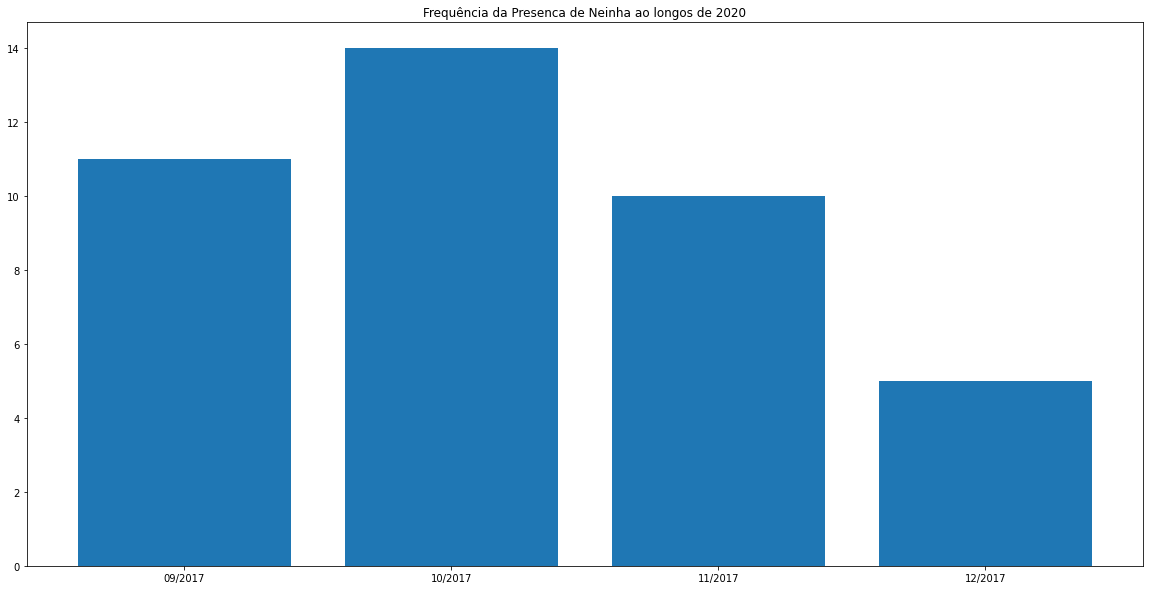

In [ ]:
NEINHA_P = NEINHA[NEINHA['attendance'] == 'attending']
NEINHA_P = NEINHA[NEINHA['year'] == 2017]
DataN = NEINHA_P.groupby(NEINHA_PRESENCA['date'].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in DataN.items():

    mes.append(i[0][0])
    presenca.append(i[1])

DataN = {'Mes': mes, 'Presenca': presenca}
DataN = pd.DataFrame(data=DataN)

DataN['Date'] = pd.to_datetime(DataN.Mes)
DataN = DataN.sort_values('Date')
DataN = DataN.sort_values(by='Date')

DataN = DataN[['Presenca', 'Date']]

time_n = []
for i in DataN['Date']:
  time_n.append(i.strftime("%m/%Y"))

plt.figure(figsize=(20,10))
plt.bar(time_n, DataN['Presenca'].to_numpy())
plt.title('Frequência da Presenca de Neinha ao longos de 2020')
plt.show()

### Amostra Total

In [ ]:
NEINHA = df[ df['name'] == 'JOSÉ CARNEIRO']
NEINHA['date'] = pd.to_datetime(NEINHA['date'])
grupos = NEINHA.groupby(NEINHA['date'].dt.strftime('%B'))['attendance'].value_counts().to_frame()
grupos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


attendance
date      attendance            
April     attending           41
          absent               5
August    attending           67
          absent               6
December  attending           35
          absent               4
February  attending           37
          justified            5
January   attending            1
July      attending            1
June      attending           34
          absent               4
March     attending           45
          justified            2
          absent               1
May       attending           52
          absent               3
November  attending           66
          absent              11
October   attending           72
          justified            4
          absent               3
September attending           59
          absent               6

## Determine o total de presenças, ausências e faltas justificadas para cada data (independente do vereador). Determine o dia da semana de cada data. Faça um boxplot para cada dia da semana com os valores diários obtidos

In [ ]:
colunas = ["attendance", "date"]

attend = df[ df['attendance'] == 'attending']
absent = df[ df['attendance'] == 'absent']
justify = df[ df['attendance'] == 'justified']

attend = attend[colunas]
absent = absent[colunas]
justify = justify[colunas]

In [ ]:
attend_g = attend.groupby(attend["date"].dt.strftime('%D%B%Y'))['attendance'].value_counts()
attend_g

date                  attendance
01/02/19January2019   attending     15
02/01/18February2018  attending     19
02/01/19February2019  attending     18
02/01/21February2021  attending     21
02/02/21February2021  attending     21
                                    ..
12/12/19December2019  attending     18
12/13/17December2017  attending     20
12/13/18December2018  attending     10
12/14/20December2020  attending     20
12/15/20December2020  attending     19
Name: attendance, Length: 438, dtype: int64

## Determine o total de presenças, ausências e faltas justificadas a cada mês de cada ano. Faça um gráfico com boxplots mensais de presença, outro com boxplots mensais de ausência e outro com boxplots mensais de faltas justificadas para cada mês com os valores mensais obtidos

In [ ]:
colunas = ["attendance", "date"]

attend = df[ df['attendance'] == 'attending']
absent = df[ df['attendance'] == 'absent']
justify = df[ df['attendance'] == 'justified']

attend = attend[colunas]
absent = absent[colunas]
justify = justify[colunas]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'boxplot de Presença, Ausência e Ausências Justificadas totais')

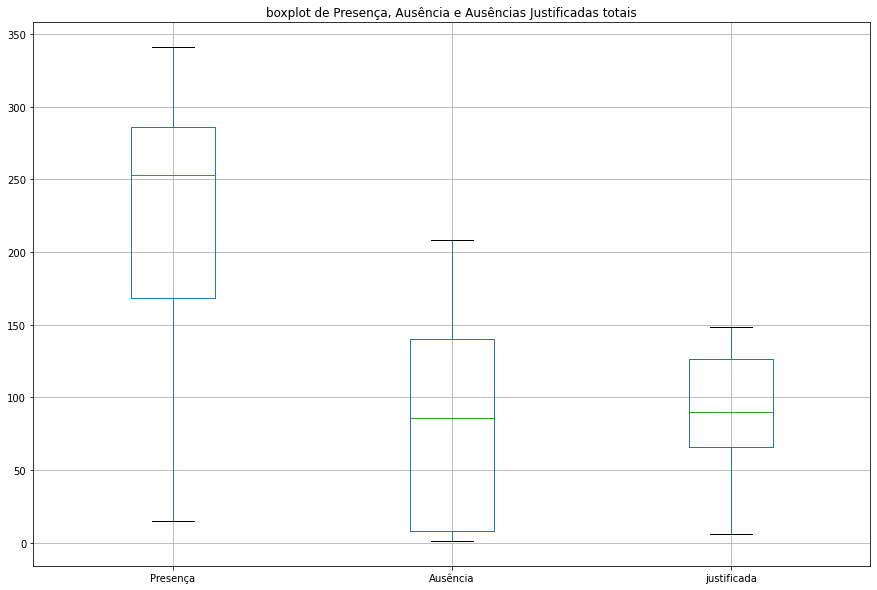

In [ ]:
attend_g = attend.groupby(attend["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in attend_g.items():

    mes.append(i[0][0])
    presenca.append(i[1])

PRESENCA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
attend_g = pd.DataFrame(data=PRESENCA_AGRUPADA)

attend_g['Date'] = pd.to_datetime(attend_g.Mes)
attend_g = attend_g.sort_values('Date')
attend_g = attend_g.sort_values(by='Date')

attend_g = attend_g[['Presenca', 'Date']]

presenca_j = attend_g['Presenca']
data_j = attend_g['Date']

time_j = []
for i in attend_g['Date']:
  time_j.append(i.strftime("%m/%Y"))

#plt.figure(figsize=(10,5))
#presenca_j.plot.box()
#plt.title('boxplot de presenças totais')
#plt.show()

###

absent_g = absent.groupby(absent["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in absent_g.items():

    mes.append(i[0][0])
    presenca.append(i[1])

AUSENCUA_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
absent_g = pd.DataFrame(data=AUSENCUA_AGRUPADA)

absent_g['Date'] = pd.to_datetime(absent_g.Mes)
absent_g = absent_g.sort_values('Date')
absent_g = absent_g.sort_values(by='Date')

absent_g = absent_g[['Presenca', 'Date']]

ausencia_j = absent_g['Presenca']
data_j = absent_g['Date']

time_j = []
for i in absent_g['Date']:
  time_j.append(i.strftime("%m/%Y"))


#plt.figure(figsize=(10,5))
#ausencia_j.plot.box()
#plt.title('boxplot de ausências totais')
#plt.show()

###

justify_g = justify.groupby(justify["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes = []
presenca = []

for i in justify_g.items():

    mes.append(i[0][0])
    presenca.append(i[1])

JUSTIFY_AGRUPADA = {'Mes': mes, 'Presenca': presenca}
justify_g = pd.DataFrame(data=JUSTIFY_AGRUPADA)

justify_g['Date'] = pd.to_datetime(justify_g.Mes)
justify_g = justify_g.sort_values('Date')
justify_g = justify_g.sort_values(by='Date')

justify_g = justify_g[['Presenca', 'Date']]

justify_j = justify_g['Presenca']
data_j = justify_g['Date']

time_j = []
for i in justify_g['Date']:
  time_j.append(i.strftime("%m/%Y"))

#plt.figure(figsize=(10,5))
#justify_j.plot.box()
#plt.title('boxplot de ausências justificadas totais')
#plt.show()

total = pd.DataFrame()
total['Presença'] = presenca_j
total['Ausência'] = ausencia_j
total['justificada'] = justify_j

total.plot.box(grid=True,figsize=(15,10))
plt.title('boxplot de Presença, Ausência e Ausências Justificadas totais')


Observa-se que a quantidade de presenças no geral ainda é melhor que a quaintidade de ausências no geral.

## Escolha 2 vereadores, determine a quantidade de presenças de cada um a cada mês a cada ano e faça um gráfico de dispersão entre vereadores

In [ ]:
JOSE_CARNEIRO_PRESENCA = JOSE_CARNEIRO[JOSE_CARNEIRO['attendance'] == 'attending']
PRESENCA_JOSE_CARNEIRO_AGRUPADA = JOSE_CARNEIRO_PRESENCA.groupby(JOSE_CARNEIRO_PRESENCA["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

NEINHA_PRESENCA = NEINHA[NEINHA['attendance'] == 'attending']
PRESENCA_NEINHA_AGRUPADA = NEINHA_PRESENCA.groupby(NEINHA_PRESENCA["date"].dt.strftime('%B'))['attendance'].value_counts()

LULINHA_PRESENCA = LULINHA[LULINHA['attendance'] == 'attending']
#LULINHA_PRESENCA['date'] = pd.to_datetime(LULINHA_PRESENCA['date'])
PRESENCA_LULINHA_AGRUPADA = LULINHA_PRESENCA.groupby(LULINHA_PRESENCA["date"].dt.strftime('%B%Y'))['attendance'].value_counts()

mes_j = []
mes_l = []
presenca_n = []
presenca_j = []
presenca_L = []

for i in PRESENCA_JOSE_CARNEIRO_AGRUPADA.items():
    mes_j.append(i[0][0])
    presenca_j.append(i[1])

for i in PRESENCA_NEINHA_AGRUPADA.items():
    presenca_n.append(i[1])

for i in PRESENCA_LULINHA_AGRUPADA .items():

    if i[0][0] != 'March2021':
      mes_l.append(i[0][0])
      presenca_L.append(i[1])

PRESENCA_2_AGRUPADA = {'Mes': mes_l, 'Presenca_LULINHA': presenca_L, 'Presenca_JOSE_CARNEIRO': presenca_j}
PRESENCA_2_AGRUPADA = pd.DataFrame(data=PRESENCA_2_AGRUPADA)
PRESENCA_2_AGRUPADA

,Mes,Presenca_LULINHA,Presenca_JOSE_CARNEIRO
0,April2018,14,17
1,April2019,13,15
2,April2020,9,9
3,August2017,15,13
4,August2018,12,20
5,August2019,14,21
6,August2020,13,13
7,December2017,6,9
8,December2018,7,9
9,December2019,8,10


Text(0.5, 0, 'Presenca_JOSE_CARNEIRO')

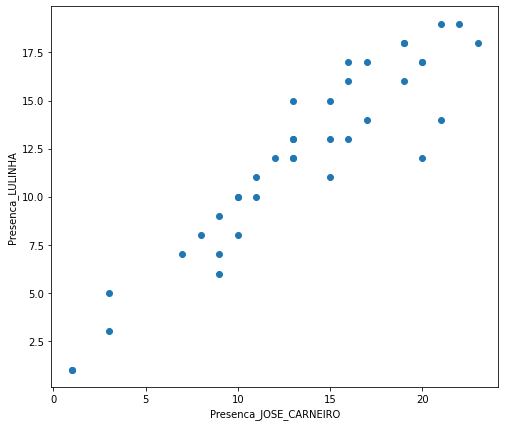

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(PRESENCA_2_AGRUPADA.Presenca_JOSE_CARNEIRO, PRESENCA_2_AGRUPADA.Presenca_LULINHA)
plt.ylabel('Presenca_LULINHA')
plt.xlabel('Presenca_JOSE_CARNEIRO')

Curiosamente, podemos observar que existe uma relação na quantidade de presença entre esses dois vereadores, mas é difícil especular o motivo. Seria interessante avaliar se esta mesma relação de crescimento nas presenças também está associada a outros veradores ou se foi somente uma causalidade.

## Como é o comportamento dos vereadores em relação as presenças nas sessões em um ano eleitoral, se comparado com os últimos anos?

In [ ]:
ano2020 = df.query("year == 2020 & attendance == 'attending'")["attendance"].count()
ano2019 = df.query("year == 2019 & attendance == 'attending'")["attendance"].count()
ano2018 = df.query("year == 2018 & attendance == 'attending'")["attendance"].count()

print("Quantidade de presenças totais no ano de 2020: ", ano2020)
print("Quantidade de presenças totais no ano de 2019: ", ano2019)
print("Quantidade de presenças totais no ano de 2018: ", ano2018)

Quantidade de presenças totais no ano de 2020:  1864
Quantidade de presenças totais no ano de 2019:  2678
Quantidade de presenças totais no ano de 2018:  2599


Podemos observar que o a quantidade de preseça nas sessões em um período eleitoral é relativamente menor do que os últimos dois anos. Uma das justificativas que pode-se especular em relação a esse acontecimento é que em um ano eleitoral os vereadores dedicam mais tempos ao processo de candidatura e apoio a outras candidaturas e com isso negligênciam as sessões da câmara.
